# Oxygen and Spin-Lattice Relaxation Rate in Water, Blood and in Tissues

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Import seaborn
import seaborn as sns
# Apply the default theme
plt.style.use('ggplot')

## 1. Oxygen and Relaxation Rate in Water
There is a linear relationship between $R1$ (or $1/T1$) and concentration of oxygen in water. 

$R1=R1_0 + r_1*C$

$\frac{T1_0-T1}{T1*T1_0} = r_1 * C $

The relationship between $C$ is the amount of oxygen added, $r_1$ is the relaxivity of oxygen in water.

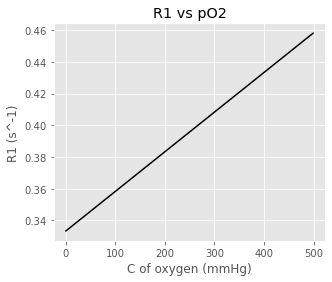

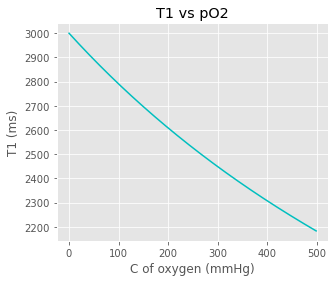

In [17]:
T1_0=3000 # T1 in ms
R1_0=(1/T1_0)*1000 # R1 in s^-1
r1_water=0.00025 #s-1/mmHg - from 2016 Muir Table 1 - water 1.5T Zaharchuk 2006
C=np.arange(0,500) # mmHg
R1_after=R1_0+(r1_water*C)
T1_after=(1/R1_after)*1000

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(C,R1_after,c='k')
plt.title('R1 vs pO2')
plt.xlabel('C of oxygen (mmHg)')
plt.ylabel('R1 (s^-1)')
ax.set_aspect(0.8/ax.get_data_ratio(), adjustable='box')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.figure(2)
plt.plot(C,T1_after,'c-')
plt.title('T1 vs pO2')
plt.xlabel('C of oxygen (mmHg)')
plt.ylabel('T1 (ms)')
ax.set_aspect(0.8/ax.get_data_ratio(), adjustable='box')


## 2. Delta T1 and Delta R1
The relationship between T1 vs delta T1, and R1 vs delta R1, after adding a source of additional relaxivity (ie 200 mmHg oxygen). Although looking at changes in T1 feels more intuitive (and has more intuitive units such as $ms$, rather than R1 $s^{-1}$, the change in T1 induced by oxygen depends on the original T1, and looking at changes in R1 instead removes this dependency. This can be seen clearly in the following plots:

Text(0, 0.5, 'Delta T1')

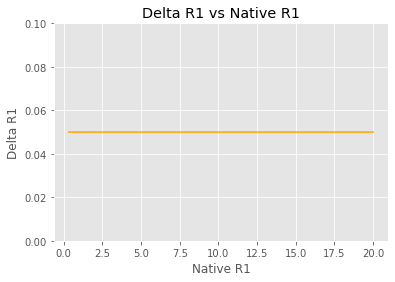

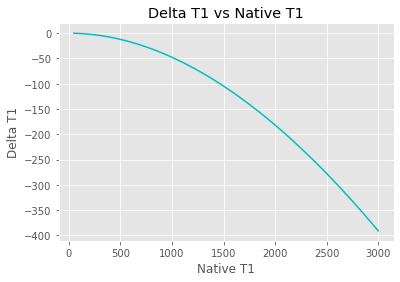

In [4]:
T1_0=np.arange(50,3000) # T1 in ms
R1_0=(1/T1_0)*1000 # R1 in s^-1
r1_water=0.00025 #s-1/mmHg - from 2016 Muir Table 1 - water 1.5T Zaharchuk 2006
C=200 # mmHg
R1_after=R1_0+(r1_water*C)
T1_after=(1/R1_after)*1000

delta_R1_example=R1_after-R1_0
delta_T1_example=T1_after-T1_0

plt.figure(2)
plt.plot(R1_0,delta_R1_example,c='orange')
plt.ylim(0,0.1)
plt.title('Delta R1 vs Native R1')
plt.xlabel('Native R1')
plt.ylabel('Delta R1')

plt.figure(1)
plt.plot(T1_0,delta_T1_example,'c-')
plt.title('Delta T1 vs Native T1')
plt.xlabel('Native T1')
plt.ylabel('Delta T1')

## 3. R1 and T1 of Blood, depending on SO2 levels
The following 3 equations are from Hales 2015 *(A general model to calculate the spin-lattice (T1) relaxation time of blood, accounting for haematocrit, oxygen saturation and magnetic field strength).* In these demos, for now we will not account for changes in magnetic field strength, and instead all values will be correct for 1.5T.

$R1_{blood}(Hct,SO2)=f_{watere}*R1_e(SO2) + (1-f_{watere})R1_p$

Where:
- R1blood = the relaxation rate of whole blood
- Hct is the hematocrit (0-1)
- SO2 is the oxygen saturation fraction (0-1)
- R1p is the longitudinal relaxation rate of plasma (s-1).


$f_{watere}$ is the fraction of water in whole blood that resides in erythrocytes(0-1), which is described by:

$f_{watere} = \frac{0.70*Hct}{0.70*Hct+0.95*(1-Hct)}$

$R1_e$ is the longitudinal relaxation rate of erythrocytes ($s^{-1}$) which can be calculated by:


$R1_e(SO2) = R1_{eox} + r1_{deoxyHb}[Hb]*(1-SO2)$


- R1eox is the relaxation rate of erythrocytes when SO2=100%
- [Hb] is the mean corpuscular haemoglobin concentration (5.15mmol Hb tetramer/L plasma)
- rdeoxyHb is the molar relaxivity of deoxyhaemoglobin (s-1 L plasma in erythrocyte/mmol Hb tetramer).


### Changing SO2, constant HcT


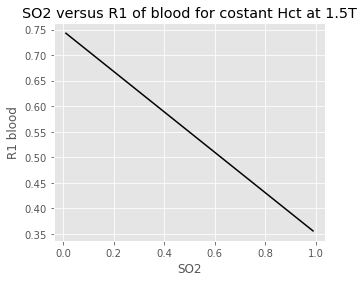

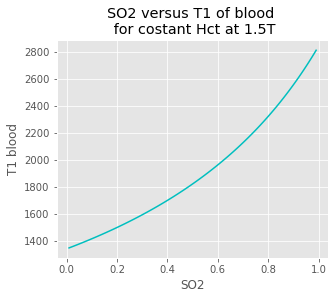

In [20]:
B0=1.5 # Tesla
Hct=0.47 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg

so2=(np.arange(1,100))/100

R1_blood=fwatere*(1.099-(0.057*B0)+((0.033*Hb)*1-so2))+((1-fwatere)*(0.496-0.023*B0))

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(so2,R1_blood, c='k')
plt.title('SO2 versus R1 of blood for costant Hct at 1.5T')
plt.xlabel('SO2')
plt.ylabel('R1 blood')
ax.set_aspect(0.8/ax.get_data_ratio(), adjustable='box')

T1_blood=(1/R1_blood)*1000

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(so2,T1_blood, 'c-')
plt.title('SO2 versus T1 of blood \n for costant Hct at 1.5T')
plt.xlabel('SO2')
plt.ylabel('T1 blood')
ax.set_aspect(0.8/ax.get_data_ratio(), adjustable='box')

### Changing Hct, Constant SO2 (0.75)

Text(0, 0.5, 'T1 blood (ms)')

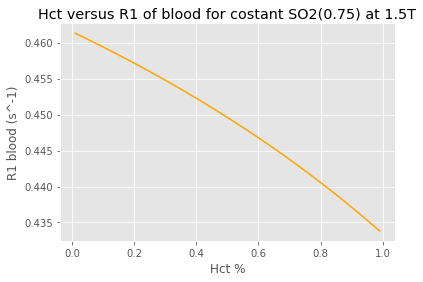

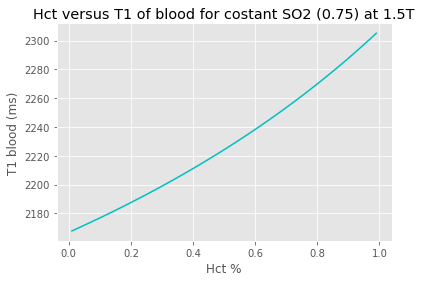

In [9]:
## R1 and T1 of Blood, depending on SO2 levels
B0=1.5 # Tesla
Hct=(np.arange(1,100))/100
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
#print(fwatere)
so2=0.75
R1_blood=fwatere*(1.099-(0.057*B0)+((0.033*Hb)*1-so2))+((1-fwatere)*(0.496-0.023*B0))

plt.figure(1)
plt.plot(Hct,R1_blood, c='orange')
plt.title('Hct versus R1 of blood for costant SO2(0.75) at 1.5T')
plt.xlabel('Hct %')
plt.ylabel('R1 blood (s^-1)')

T1_blood=(1/R1_blood)*1000

plt.figure(2)
plt.plot(Hct,T1_blood, 'c-')
plt.title('Hct versus T1 of blood for costant SO2 (0.75) at 1.5T')
plt.xlabel('Hct %')
plt.ylabel('T1 blood (ms)')

## 4. Including the Oxygen Dissociation Curve
The [oxygen–hemoglobin dissociation curve](https://en.wikipedia.org/wiki/Oxygen%E2%80%93hemoglobin_dissociation_curve), or oxygen dissociation curve (ODC), relates oxygen saturation (SO2) and partial pressure of oxygen in the blood (PO2), and is determined by what is called "hemoglobin affinity for oxygen"; that is, how readily hemoglobin acquires and releases oxygen molecules into the fluid that surrounds it.

To relate the oxygen tesnion in the blood to the SO2, we can use the following equation from Severinghaus' ['Simple, accurate equations for human blood O2 dissociation computations'](http://www.nickalls.org/dick/papers/anes/JWSrevised2007.pdf):

$S=((23400*((pO2**3)+150*pO2)^{-1}+1)^{-1})$


(0.0, 100.0)

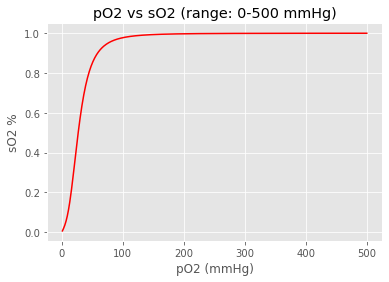

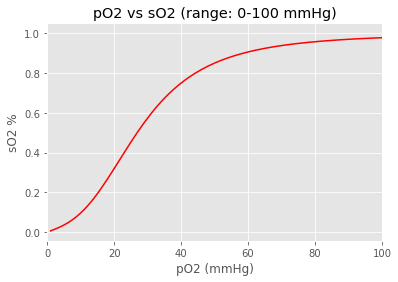

In [10]:
po2_list=np.arange(1,501)
so2_list=np.zeros(500)
for i in range(1,501):
    po2=i
    S=((23400*((po2**3)+150*po2)**(-1)+1)**(-1))
    #print(S*100)
    so2_list[i-1]=S
    
plt.figure(1)
plt.plot(po2_list,so2_list, 'r-')
plt.title('pO2 vs sO2 (range: 0-500 mmHg)')
plt.xlabel('pO2 (mmHg)')
plt.ylabel('sO2 %')


plt.figure(2)
plt.plot(po2_list,so2_list, 'r-')
plt.title('pO2 vs sO2 (range: 0-100 mmHg)')
plt.xlabel('pO2 (mmHg)')
plt.ylabel('sO2 %')
plt.xlim(0,100)


## 5. Relating paO2 & pvO2 to R1

0.3951951951951952


(0.0, 100.0)

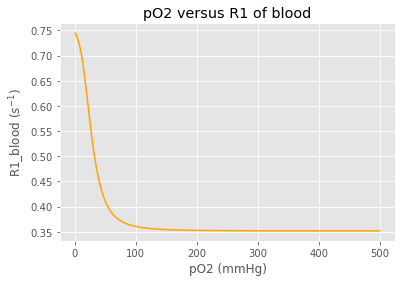

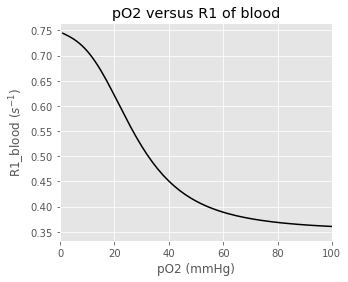

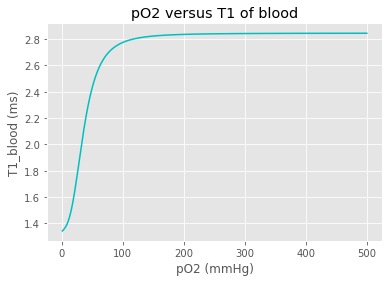

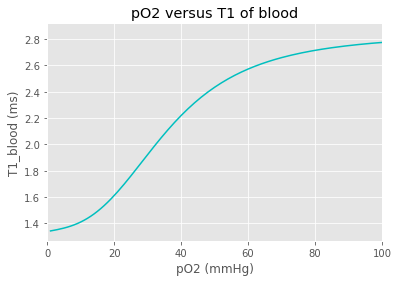

In [22]:
B0=1.5 # Tesla
Hct=0.47 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
print(fwatere)

so2_list=np.zeros(500)

for i in range(1,501):
    po2=i
    S=((23400*((po2**3)+150*po2)**(-1)+1)**(-1))
    #print(S*100)
    so2_list[i-1]=S

so2=so2_list 

R1_blood=fwatere*(1.099-(0.057*B0)+((0.033*Hb)*1-so2))+((1-fwatere)*(0.496-0.023*B0))

T1_blood=1/(R1_blood)

plt.figure(1)
plt.plot(po2_list,R1_blood, c='orange')
plt.title('pO2 versus R1 of blood')
plt.xlabel('pO2 (mmHg)')
plt.ylabel('R1_blood ($s^{-1}$)')


fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(po2_list,R1_blood, c='k')
plt.title('pO2 versus R1 of blood')
plt.xlabel('pO2 (mmHg)')
plt.ylabel('R1_blood ($s^{-1}$)')
plt.xlim(0,100)
ax.set_aspect(0.8/ax.get_data_ratio(), adjustable='box')

plt.figure(3)
plt.plot(po2_list,T1_blood, 'c')
plt.title('pO2 versus T1 of blood')
plt.xlabel('pO2 (mmHg)')
plt.ylabel('T1_blood (ms)')


plt.figure(4)
plt.plot(po2_list,T1_blood, 'c')
plt.title('pO2 versus T1 of blood')
plt.xlabel('pO2 (mmHg)')
plt.ylabel('T1_blood (ms)')
plt.xlim(0,100)

## 6. Considering the effect of adding surplus oxygen to the blood system

#### Looking at delta R1 from adding surplus oxygen to the blood, i.e. from breathing 100% oxygen, helps us avoid having to know the original R1 of plasma or R1_eox:

$\Delta R1_{blood}=R1_{blood-after}-R1_{blood-before}$

#### Starting with the equation from Hill 2015:

$R1_{blood}=f_{watere}*(R1_{eox} + r1_{deoxyHb}[Hb]*(1-SO2)) + (1-f_{watere})R1_p$

#### Substitute to find delta R1:

$\Delta R1_{blood}=(f_{watere}*(R1_{eox} + r1_{deoxyHb}[Hb]*(1-SO2_{after})) + (1-f_{watere})R1_{p-after}) - (f_{watere}*(R1_{eox} + r1_{deoxyHb}[Hb]*(1-SO2_{before})) + (1-f_{watere})R1_{p-before})$

$\Delta R1_{blood}=f_{watere}*(R1_{eox}+r1_{deoxyHb}[Hb]*(1-SO2_{after}))-f_{watere}*(R1_{eox}+r1_{deoxyHb}[Hb]*(1-SO2_{before})) + (1-f_{watere})R1_{p-after}) - (1-f_{watere})R1_{p-before})$

$\Delta R1_{blood}=f_{watere}*(R1_{eox}+r1_{deoxyHb}[Hb]*(1-SO2_{after})-R1_{eox}-r1_{deoxyHb}[Hb]*(1-SO2_{before})) + (1-f_{watere})(R1_{p-after}-R1_{p-before})$

#### R1_eox cancels out, and we see a $\Delta R1_p$ section form which is easy to calculate by r1*C

$\Delta R1_{blood}=f_{watere}*r1_{deoxyHb}*[Hb]((1-SO2_{after})-(1-SO2_{before})) + (1-f_{watere})(\Delta R1_p)$

#### Now we only need to know the change in pO2, which will determine the sO2, and also the C to determine the delta R1 in plasma. The others are constants:
- fwatere = 0.395 (depending on Hct)
- r1deoxyHb = 0.033 s^-1 L plasma in erythrocyte /mmol Hb tetramer 
- [Hb] = 0.515 mmol Hb tetramer / L plasma

### Change in R1 depends on starting paO2 (as we can see here)

Text(0, 0.5, '$\\Delta R1  (s^{-1})$')

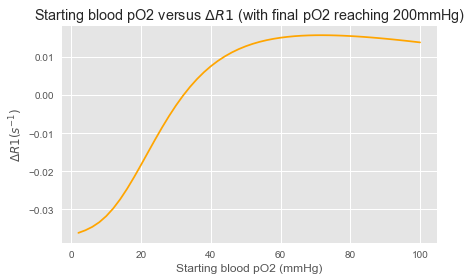

In [447]:
# B0=1.5 # Tesla
Hct=0.47 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg

paO2_list=np.arange(2,102,2,dtype=float)# mmHg[10,20,30,40,50,60,70,80,90,100] #mmHg
delta_R1bloodtotal_list=np.zeros(len(paO2_list))
for i in range(0,len(paO2_list)):
    #R1arterialbefore:
    paO2before=paO2_list[i] #mmHg
    Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

    #R1arterialafter:
    paO2after=200 #mmHg
    Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

    deltapaO2=paO2after-paO2before
    #deltaR1plasma=R1plasmabefore-R1plasmaafter
    deltaR1plasma=r1*deltapaO2

    deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
    #print('delta R1 blood total is '+str(deltaR1bloodtotal))
    delta_R1bloodtotal_list[i]=deltaR1bloodtotal

plt.figure(1)
plt.plot(paO2_list,delta_R1bloodtotal_list, c='orange')
plt.title('Starting blood pO2 versus $\Delta R1$ (with final pO2 reaching 200mmHg)')
plt.xlabel('Starting blood pO2 (mmHg)')
plt.ylabel('$\Delta R1  (s^{-1})$')


### Change in R1 depending on both starting blood pO2 and final blood pO2

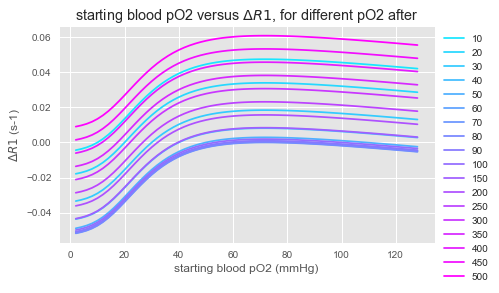

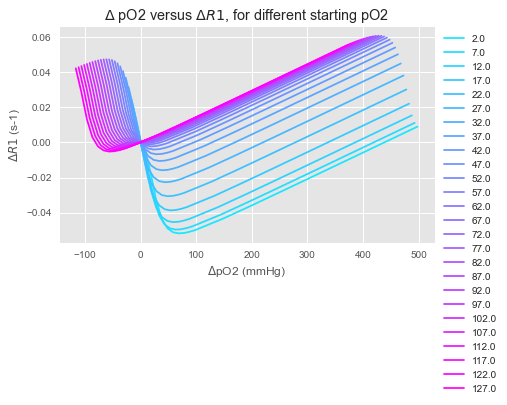

In [448]:
# B0=1.5 # Tesla
Hct=0.47 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg

from matplotlib import cm
from colorspacious import cspace_converter #pip install colorspacious
from collections import OrderedDict


paO2_after_list=[10,20,30,40,50,60,70,80,90,100,150,200,250,300,350,400,450,500]
paO2_before_list=np.arange(2,130,2,dtype=float)# mmHg
delta_R1bloodtotal_list=np.zeros(len(paO2_before_list))

        
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for j in range(0,len(paO2_after_list)):
    for i in range(0,len(paO2_before_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

        deltapaO2=paO2after-paO2before
        #deltaR1plasma=R1plasmabefore-R1plasmaafter
        deltaR1plasma=r1*deltapaO2

        deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
        #print('delta R1 blood total is '+str(deltaR1bloodtotal))
        delta_R1bloodtotal_list[i]=deltaR1bloodtotal

    ax1.plot(paO2_before_list,delta_R1bloodtotal_list,label=str(paO2after))
    
colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
    
plt.title('starting blood pO2 versus $\Delta R1$, for different pO2 after')
plt.xlabel('starting blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))

paO2_before_list=np.arange(2,130,5,dtype=float)

delta_R1bloodtotal_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))
deltapaO2_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for i in range(0,len(paO2_before_list)):
    for j in range(0,len(paO2_after_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

        deltapaO2=paO2after-paO2before
        deltapaO2_list[i,j]=deltapaO2
        #deltaR1plasma=R1plasmabefore-R1plasmaafter
        deltaR1plasma=r1*deltapaO2

        deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
        #print('delta R1 blood total is '+str(deltaR1bloodtotal))
        delta_R1bloodtotal_list[i,j]=deltaR1bloodtotal

    
for i in range(0,len(paO2_before_list)):
    plt.plot(deltapaO2_list[i],delta_R1bloodtotal_list[i],label=paO2_before_list[i])

    #plt.plot(deltapaO2_list[1],delta_R1bloodtotal_list[1],label=paO2_before_list[1])
#print(deltapaO2_list)
#print(delta_R1voxeltotal_list)

colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
    
    
plt.title('$\Delta$ pO2 versus $\Delta R1$, for different starting pO2')
plt.xlabel('$\Delta $pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))




## 7. Encorporating a tissue compartment
In a voxel with tissue as well, the contrast changes due to deoxyHb changes in the blood may be negligible, however the blood compartment itself determines the resulting paO2 from the added oxygen, which will be in equilibrium with the ptO2.

$\Delta R1_{voxeltotal}=bloodvolume*\Delta R1_{bloodtotal}+(1-bloodvolume)*r1*\Delta paO2$

I've added a component called bloodvolume, which is the percent of the voxel that would be considered blood (range 0-1).

#### You can play with 'vasculardensity' value to see the changes that would occur from highly vascular areas of a tumour where the deoxyHb contrast would perhaps be more significant.

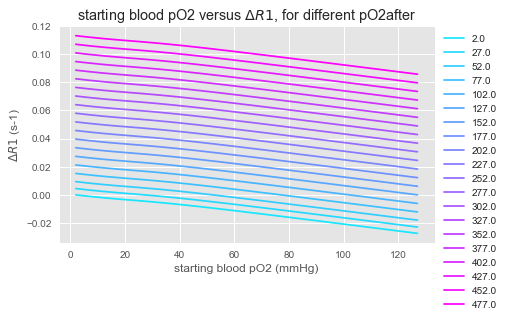

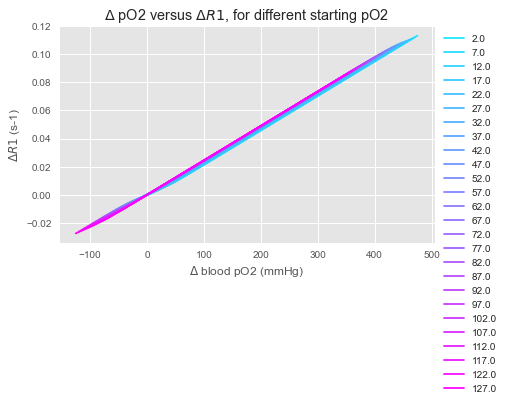

In [457]:
# B0=1.5 # Tesla
Hct=0.47 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg

paO2_after_list=np.arange(2,500,25,dtype=float)
paO2_before_list=np.arange(2,130,5,dtype=float) #mmHg
delta_R1voxeltotal_list=np.zeros(len(paO2_before_list))

bloodvolume = 0.05

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for j in range(0,len(paO2_after_list)):
    for i in range(0,len(paO2_before_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

        deltapaO2=paO2after-paO2before
        #deltaR1plasma=R1plasmabefore-R1plasmaafter
        deltaR1plasma=r1*deltapaO2

        deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
        #print('delta R1 blood total is '+str(deltaR1bloodtotal))
        
        deltaR1_voxeltotal=bloodvolume*deltaR1bloodtotal+(1-bloodvolume)*r1*deltapaO2
        delta_R1voxeltotal_list[i]=deltaR1_voxeltotal    
    plt.plot(paO2_before_list,delta_R1voxeltotal_list,label=str(paO2after))
    
colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.title('starting blood pO2 versus $\Delta R1$, for different pO2after')
plt.xlabel('starting blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))

delta_R1voxeltotal_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))
deltapaO2_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for i in range(0,len(paO2_before_list)):
    for j in range(0,len(paO2_after_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

        deltapaO2=paO2after-paO2before
        deltapaO2_list[i,j]=deltapaO2
        #print(deltapaO2_list)
        #deltaR1plasma=R1plasmabefore-R1plasmaafter
        deltaR1plasma=r1*deltapaO2
        
        deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
        #print('delta R1 blood total is '+str(deltaR1bloodtotal))
        
        deltaR1_voxeltotal=bloodvolume*deltaR1bloodtotal+(1-bloodvolume)*r1*deltapaO2
        delta_R1voxeltotal_list[i,j]=deltaR1_voxeltotal
        
for i in range(0,len(paO2_before_list)):
    plt.plot(deltapaO2_list[i],delta_R1voxeltotal_list[i],label=paO2_before_list[i])
    
#print(deltapaO2_list)
#print(delta_R1voxeltotal_list)

colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
    
plt.title('$\Delta$ pO2 versus $\Delta R1$, for different starting pO2')
plt.xlabel('$\Delta$ blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))

### Vacular Density = 0, i.e. Necrotic Tissue

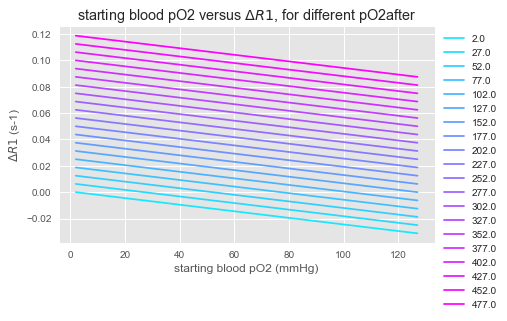

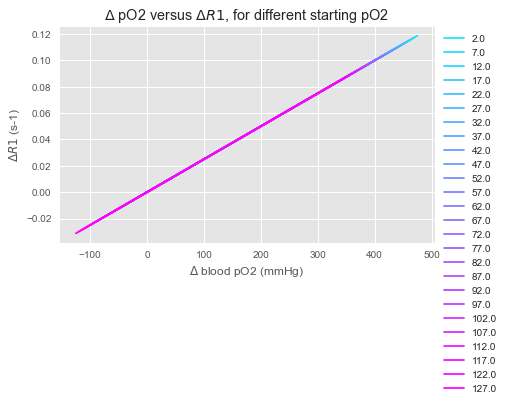

In [458]:
# B0=1.5 # Tesla
Hct=0.47 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg

paO2_after_list=np.arange(2,500,25,dtype=float)
paO2_before_list=np.arange(2,130,5,dtype=float) #mmHg
delta_R1voxeltotal_list=np.zeros(len(paO2_before_list))

vasculardensity = 0

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for j in range(0,len(paO2_after_list)):
    for i in range(0,len(paO2_before_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

        deltapaO2=paO2after-paO2before
        #deltaR1plasma=R1plasmabefore-R1plasmaafter
        deltaR1plasma=r1*deltapaO2

        deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
        #print('delta R1 blood total is '+str(deltaR1bloodtotal))
        
        deltaR1_voxeltotal=vasculardensity*deltaR1bloodtotal+(1-vasculardensity)*r1*deltapaO2
        delta_R1voxeltotal_list[i]=deltaR1_voxeltotal    
    plt.plot(paO2_before_list,delta_R1voxeltotal_list,label=str(paO2after))
    
colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.title('starting blood pO2 versus $\Delta R1$, for different pO2after')
plt.xlabel('starting blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))


delta_R1voxeltotal_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))
deltapaO2_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for i in range(0,len(paO2_before_list)):
    for j in range(0,len(paO2_after_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

        deltapaO2=paO2after-paO2before
        deltapaO2_list[i,j]=deltapaO2
        #print(deltapaO2_list)
        #deltaR1plasma=R1plasmabefore-R1plasmaafter
        deltaR1plasma=r1*deltapaO2
        
        deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
        #print('delta R1 blood total is '+str(deltaR1bloodtotal))
        
        deltaR1_voxeltotal=vasculardensity*deltaR1bloodtotal+(1-vasculardensity)*r1*deltapaO2
        delta_R1voxeltotal_list[i,j]=deltaR1_voxeltotal
        
for i in range(0,len(paO2_before_list)):
    plt.plot(deltapaO2_list[i],delta_R1voxeltotal_list[i],label=paO2_before_list[i])
    
#print(deltapaO2_list)
#print(delta_R1voxeltotal_list)

colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
    
plt.title('$\Delta$ pO2 versus $\Delta R1$, for different starting pO2')
plt.xlabel('$\Delta$ blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))

### Vacular Density = 0.2 (exaggerated blood compartment)

(-0.02, 0.04)

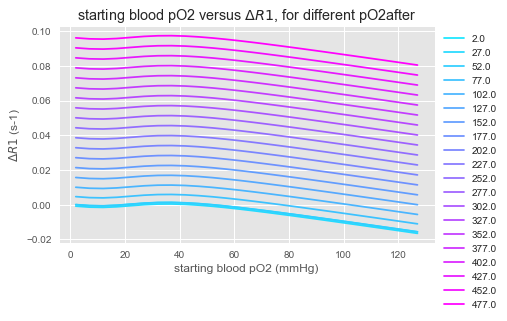

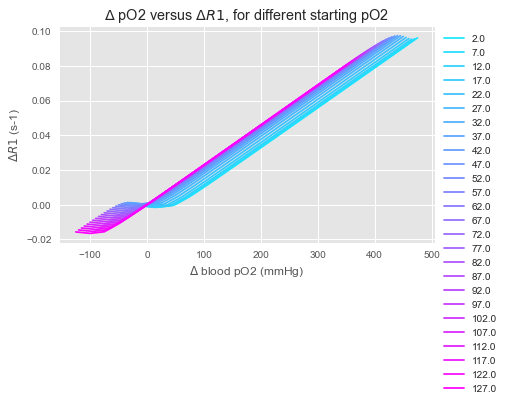

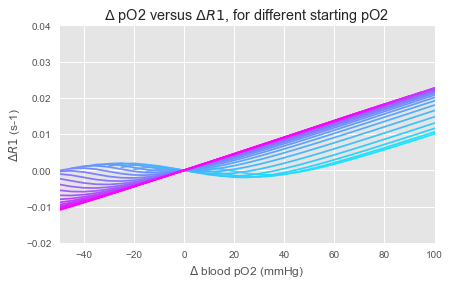

In [460]:
# B0=1.5 # Tesla
Hct=0.47 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg

paO2_after_list=np.arange(2,500,25,dtype=float)
paO2_before_list=np.arange(2,130,5,dtype=float)
delta_R1voxeltotal_list=np.zeros(len(paO2_before_list))

vasculardensity = 0.2

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for j in range(0,len(paO2_after_list)):
    for i in range(0,len(paO2_before_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

        deltapaO2=paO2after-paO2before
        #deltaR1plasma=R1plasmabefore-R1plasmaafter
        deltaR1plasma=r1*deltapaO2

        deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
        #print('delta R1 blood total is '+str(deltaR1bloodtotal))
        
        deltaR1_voxeltotal=vasculardensity*deltaR1bloodtotal+(1-vasculardensity)*r1*deltapaO2
        delta_R1voxeltotal_list[i]=deltaR1_voxeltotal
        
    plt.plot(paO2_before_list,delta_R1voxeltotal_list,label=str(paO2after))
    
colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    

plt.title('starting blood pO2 versus $\Delta R1$, for different pO2after')
plt.xlabel('starting blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))

delta_R1voxeltotal_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))
deltapaO2_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

for i in range(0,len(paO2_before_list)):
    for j in range(0,len(paO2_after_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

        deltapaO2=paO2after-paO2before
        deltapaO2_list[i,j]=deltapaO2
        #print(deltapaO2_list)
        #deltaR1plasma=R1plasmabefore-R1plasmaafter
        deltaR1plasma=r1*deltapaO2
        
        deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
        #print('delta R1 blood total is '+str(deltaR1bloodtotal))
        
        deltaR1_voxeltotal=vasculardensity*deltaR1bloodtotal+(1-vasculardensity)*r1*deltapaO2
        delta_R1voxeltotal_list[i,j]=deltaR1_voxeltotal
        
for i in range(0,len(paO2_before_list)):
    plt.plot(deltapaO2_list[i],delta_R1voxeltotal_list[i],label=paO2_before_list[i])
    
#print(deltapaO2_list)
#print(delta_R1voxeltotal_list)

colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])
    
plt.title('$\Delta$ pO2 versus $\Delta R1$, for different starting pO2')
plt.xlabel('$\Delta$ blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
plt.legend(bbox_to_anchor=(1, 1))


##############
paO2_after_list=np.arange(2,200,5,dtype=float)
paO2_before_list=np.arange(2,130,5,dtype=float)
delta_R1voxeltotal_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))
deltapaO2_list=np.zeros((len(paO2_before_list),len(paO2_after_list)))

for i in range(0,len(paO2_before_list)):
    for j in range(0,len(paO2_after_list)):
        #R1arterialbefore:
        paO2before=paO2_before_list[i] #mmHg
        Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

        #R1arterialafter:
        paO2after=paO2_after_list[j] #mmHg
        Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

        deltapaO2=paO2after-paO2before
        deltapaO2_list[i,j]=deltapaO2
        #print(deltapaO2_list)
        #deltaR1plasma=R1plasmabefore-R1plasmaafter
        deltaR1plasma=r1*deltapaO2
        
        deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
        #print('delta R1 blood total is '+str(deltaR1bloodtotal))
        
        deltaR1_voxeltotal=vasculardensity*deltaR1bloodtotal+(1-vasculardensity)*r1*deltapaO2
        delta_R1voxeltotal_list[i,j]=deltaR1_voxeltotal
        
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)

for i in range(0,len(paO2_before_list)):
    plt.plot(deltapaO2_list[i],delta_R1voxeltotal_list[i],label=paO2_before_list[i])
    
#print(deltapaO2_list)
#print(delta_R1voxeltotal_list)

colormap = plt.cm.cool #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.1, 1,len(ax2.lines))]
for i,j in enumerate(ax3.lines):
    j.set_color(colors[i])
    
plt.title('$\Delta$ pO2 versus $\Delta R1$, for different starting pO2')
plt.xlabel('$\Delta$ blood pO2 (mmHg)')
plt.ylabel('$\Delta R1$ (s-1)')
#plt.legend(bbox_to_anchor=(1, 1))
plt.xlim(-50,100)
plt.ylim(-0.02,0.04)


# End (below here is a scrapyard)

### Looking at why R1 correlates with delta R1 in the ART trial

As seen in section 2, $\Delta T1$ will correlate with native T1. But the relationship between $\Delta R1$ and native R1 (in water) should be a flat line, like this:

Text(0, 0.5, '$\\Delta R1$ (s-1)')

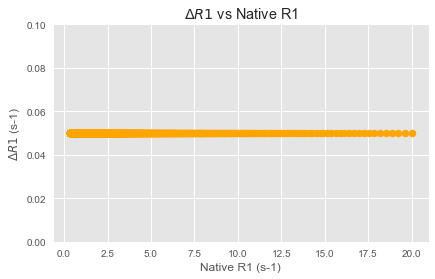

In [464]:
T1_0=np.arange(50,3000) # T1 in ms
R1_0=(1/T1_0)*1000 # R1 in s^-1
r1_water=0.00025 #s-1/mmHg - from 2016 Muir Table 1 - water 1.5T Zaharchuk 2006
C=200 # mmHg
R1_after=R1_0+(r1_water*C)
delta_R1_example=R1_after-R1_0
plt.figure(2)
plt.scatter(R1_0,delta_R1_example,c='orange')
plt.ylim(0,0.1)
plt.title('$\Delta R1$ vs Native R1')
plt.xlabel('Native R1 (s-1)')
plt.ylabel('$\Delta R1$ (s-1)')

### ART trial results 
<img src="https://i.ibb.co/QXpFfJg/Picture-1.png" alt="drawing" width="500" align="left"/>

### Trying to use this model to see if that correlation makes sense in tissues?
I'm not able to get a native $R1$ from the tissue model (yet), since I'd have to know the relationship between the native tissue $R1$ values and blood oxygenation, rather than just the changes in R1 and oxygenation. 

So far, the model can calculate $\Delta R1$ from changes in pO2 for various starting pO2s, but can't calculate what the native $R1$ would be from that. 
There are some results from a 2012 paper where a correlation was shown between tissue po2 and tissue $T1$, so I could roughly use that slope to infer what the native $R1$ would be from the starting pO2s, to see if it makes sense to have a correlation between native $R1$ and $\Delta R1$...

This is the negative correlation between native T1 and pO2 (R2=0.74) ([from Akber 2012](https://ezproxy-prd.bodleian.ox.ac.uk:2102/10.1017/S1460396911000458)), but I actually disagree with him including breast and liver in the plot - liver was shown to not change with O2 in a previous paper (Matsumoto), and breast tissue is fat, which has a very low T1.  

<img src="https://i.ibb.co/mRtd32W/Screenshot-2020-10-21-at-20-06-32.png" alt="drawing" width="500" align="left"/>


It turns out, the breast and liver are the two outliers. So I'll recalculate the slope and use that equation to relate tissue and native oxygen levels. 

best fit line:
y = 1187.25 + -9.60x


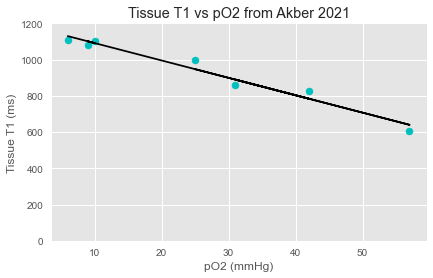

In [467]:
organT1=[998,827,862,605,1080,1101,1110]
medianpO2=[25,42,31,57,9,10,6]
plt.figure()
plt.scatter(medianpO2,organT1, c='c')
plt.title('Tissue T1 vs pO2 from Akber 2021')
plt.ylabel('Tissue T1 (ms)')
plt.ylim(0,1200)
plt.xlabel('pO2 (mmHg)')

def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

# solution
a, b = best_fit(medianpO2,organT1)
yfit = [a + b * xi for xi in medianpO2]
plt.plot(medianpO2, yfit,'k')

best fit line:
y = 0.76 + 0.01x


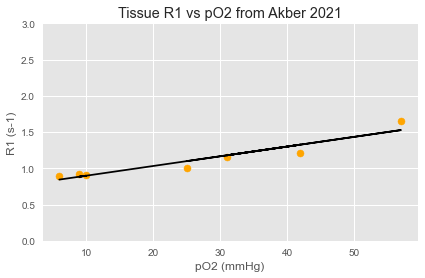

In [468]:
organT1=[998,827,862,605,1080,1101,1110]
medianpO2=[25,42,31,57,9,10,6]
organR1=(1/np.asarray(organT1))*1000
plt.figure()
plt.scatter(medianpO2,organR1,c='orange')
plt.ylabel('R1 (s-1)')
plt.title('Tissue R1 vs pO2 from Akber 2021')
plt.ylim(0,3)
plt.xlabel('pO2 (mmHg)')

def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

# solution
a, b = best_fit(medianpO2,organR1)
yfit = [a + b * xi for xi in medianpO2]
plt.plot(medianpO2, yfit,'k')

Text(0, 0.5, '$\\Delta T1$ (ms)')

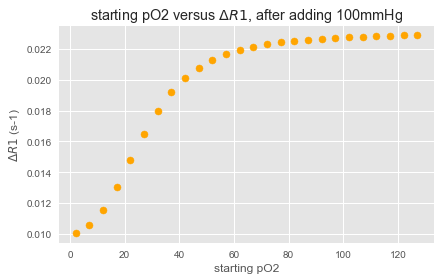

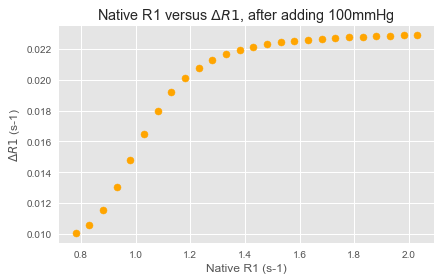

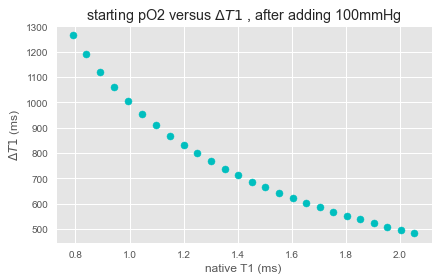

In [469]:
# B0=1.5 # Tesla
Hct=0.47 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
fwatere=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
#print(fwatere)
r1deoxyHb=0.033 #s-1 L plasma in erythrocyte / mmol Hb tetramer
r1=0.00025 #s-1/mmHg

paO2_before_list=np.arange(2,130,5,dtype=float)
delta_R1voxeltotal_list=np.zeros(len(paO2_before_list))

vasculardensity = 0.2

for i in range(0,len(paO2_before_list)):
    #R1arterialbefore:
    paO2before=paO2_before_list[i] #mmHg
    Sbefore=((23400*((paO2before**3)+150*paO2before)**(-1)+1)**(-1))

    #R1arterialafter:
    deltapaO2=100
    paO2after=deltapaO2+paO2before #mmHg
    Safter=((23400*((paO2after**3)+150*paO2after)**(-1)+1)**(-1))

    #deltaR1plasma=R1plasmabefore-R1plasmaafter
    deltaR1plasma=r1*deltapaO2

    deltaR1bloodtotal=fwatere*r1deoxyHb*Hb*((1-Safter)-(1-Sbefore))+(1-fwatere)*(deltaR1plasma)
    #print('delta R1 blood total is '+str(deltaR1bloodtotal))

    deltaR1_voxeltotal=vasculardensity*deltaR1bloodtotal+(1-vasculardensity)*r1*deltapaO2
    delta_R1voxeltotal_list[i]=deltaR1_voxeltotal
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

plt.scatter(paO2_before_list,delta_R1voxeltotal_list, c='orange')

plt.title('starting pO2 versus $\Delta R1$, after adding 100mmHg')
plt.xlabel('starting pO2')
plt.ylabel('$\Delta R1$ (s-1)')


originalR1 = 0.76 + 0.01*(paO2_before_list)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

plt.scatter(originalR1,delta_R1voxeltotal_list, c='orange')
plt.title('Native R1 versus $\Delta R1$, after adding 100mmHg')
plt.xlabel('Native R1 (s-1)')
plt.ylabel('$\Delta R1$ (s-1)')


oxR1=delta_R1voxeltotal_list+originalR1
oxT1=(1/oxR1)*1000
originalT1=(1/oxT1)*1000
deltaT1=oxT1-originalT1

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)

plt.scatter(originalT1,deltaT1, c='c')
plt.title('starting pO2 versus $\Delta T1$ , after adding 100mmHg')
plt.xlabel('native T1 (ms)')
plt.ylabel('$\Delta T1$ (ms)')
